In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.drop(["customerID", "TotalCharges"], axis=1, inplace=True)

In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [8]:
df.rename(columns = {'gender':'Gender', 'tenure':'Tenure'}, inplace = True)

In [9]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['SeniorCitizen'] = label_encoder.fit_transform(df['SeniorCitizen'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'])
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [11]:
X = df.drop(columns=['Churn', 'Contract', 'StreamingTV', 'StreamingMovies', 'DeviceProtection'])
y = df['Churn']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [14]:
y_pred = logistic_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8159015617605301


In [15]:
y_pred = logistic_classifier.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7993914807302231


In [16]:
y_pred = logistic_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8159015617605301


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1539
           1       0.71      0.55      0.62       574

    accuracy                           0.82      2113
   macro avg       0.78      0.73      0.75      2113
weighted avg       0.81      0.82      0.81      2113



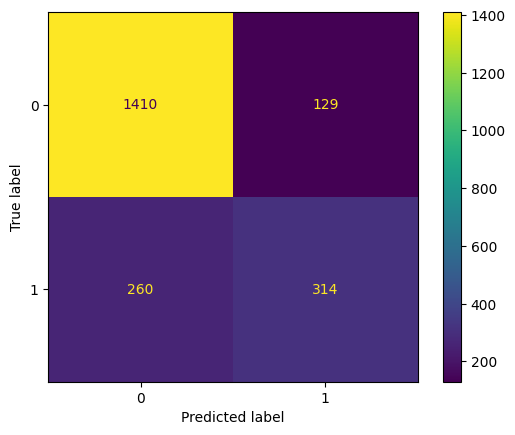

In [18]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [19]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Precision: 0.708803611738149
Recall: 0.5470383275261324


In [20]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(logistic_classifier, X, y, cv=10)
y_scores = cross_val_predict(logistic_classifier, X,y, cv=10, method="decision_function")

In [21]:
from sklearn.metrics import precision_recall_curve
precisions,recalls, thresholds = precision_recall_curve(y, y_scores)

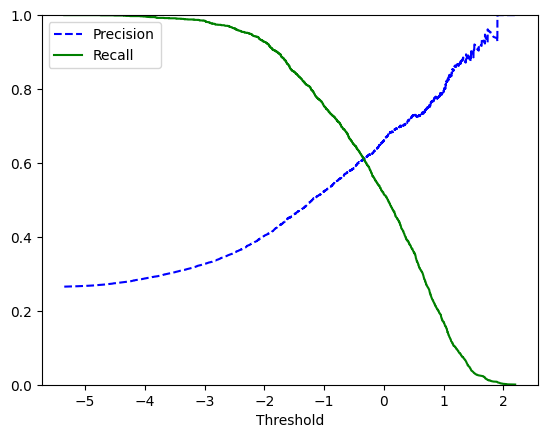

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0, 0.5, 'Precision')

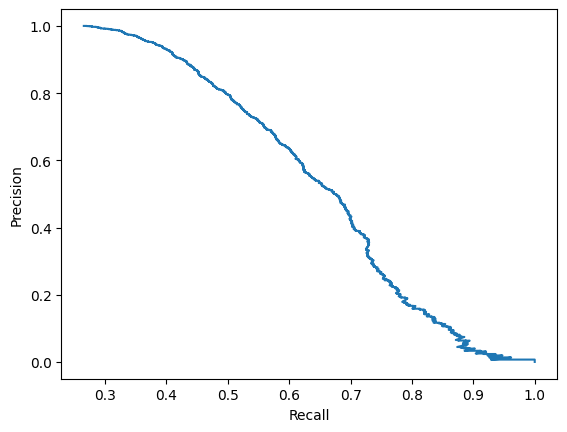

In [23]:
plt.plot(precisions, recalls)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [24]:
y_new_scores = (y_scores > -0.3)
print("New Precision: ", precision_score(y, y_new_scores))
print("New Recall: ", recall_score(y, y_new_scores))

New Precision:  0.6154266958424508
New Recall:  0.6019261637239165


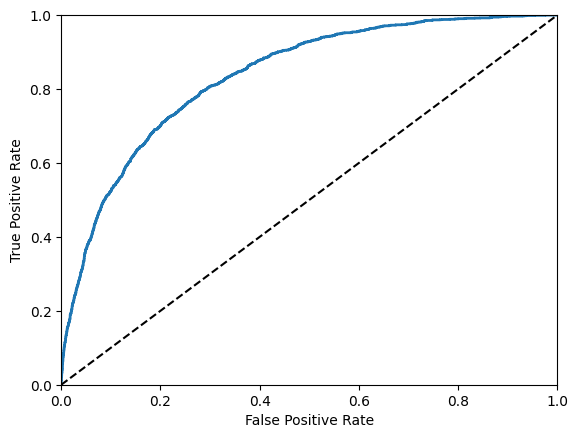

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
plot_roc_curve(fpr,tpr)
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
print("ROC and AUC score is: ", roc_auc_score(y, y_scores))

ROC and AUC score is:  0.8349379010126567


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
X = df.drop(columns=['Churn', 'Contract', 'StreamingTV', 'StreamingMovies', 'DeviceProtection'])
y = df['Churn']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
gbc = GradientBoostingClassifier(n_estimators=200,
                                 learning_rate=0.04,
                                 random_state=42,
                                 max_features=8 )

In [31]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.04, max_features=8, n_estimators=200,
                           random_state=42)

In [32]:
y_pred = gbc.predict(X_test)

In [33]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8007572172266919


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.50      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



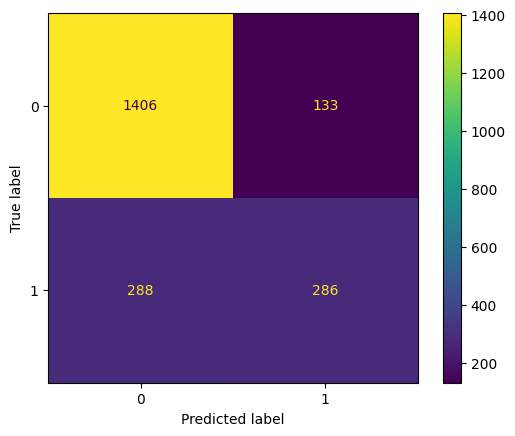

In [35]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [36]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Precision: 0.6825775656324582
Recall: 0.49825783972125437


In [37]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(gbc, X, y, cv=10)
y_scores = cross_val_predict(gbc, X,y, cv=10, method="decision_function")

In [38]:
from sklearn.metrics import precision_recall_curve
precisions,recalls, thresholds = precision_recall_curve(y, y_scores)

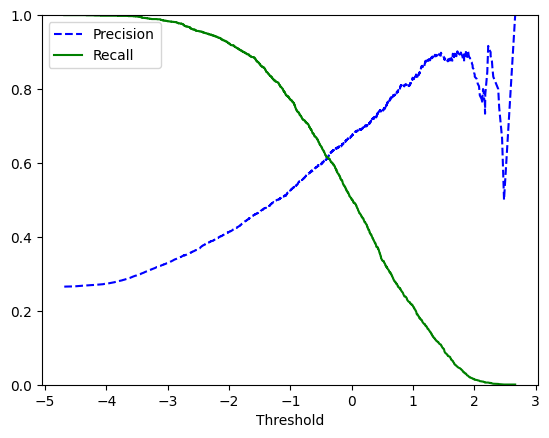

In [39]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0, 0.5, 'Precision')

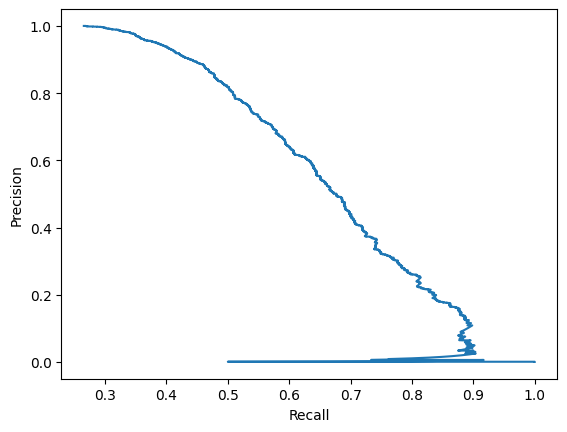

In [40]:
plt.plot(precisions, recalls)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [41]:
y_new_scores = (y_scores > -0.35)
print("New Precision: ", precision_score(y, y_new_scores))
print("New Recall: ", recall_score(y, y_new_scores))

New Precision:  0.6261733848702374
New Recall:  0.6067415730337079


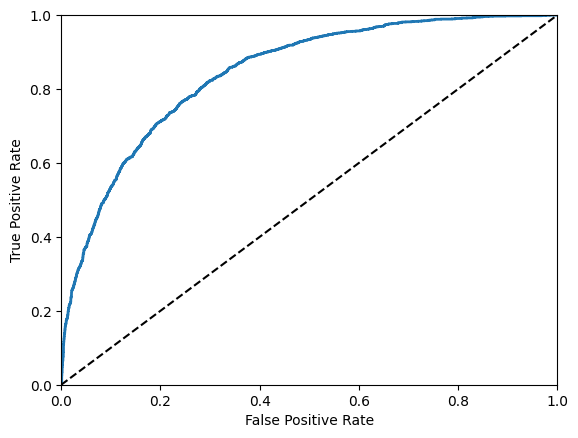

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
plot_roc_curve(fpr,tpr)
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score
print("ROC and AUC score is: ", roc_auc_score(y, y_scores))

ROC and AUC score is:  0.842921288336567
